# **Preprocessing Steps**

**Import necessary libraries**

In [1]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
import cv2
import os

**Load and Display data**

In [2]:
path = "/home/coder/project/"

train = pd.read_csv(path + 'train.csv')

train.head()

id_code  diagnosis
0  000c1434d8d7          2
1  001639a390f0          4
2  0024cdab0c1e          1
3  002c21358ce6          0
4  005b95c28852          0

Visualize the Distribution of Diagnostic Categories

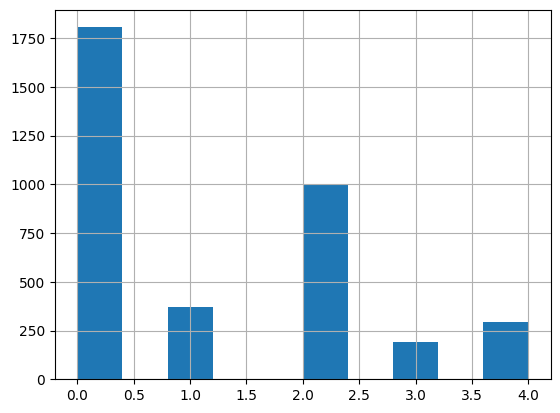

In [3]:
train['diagnosis'].hist();

Showing some images from train_images

In [4]:
files = os.listdir(path + "train_images")

**Load and Process Images**

In [5]:
img_list = []

for i in files[0:20]:
    image = cv2.imread(path + "train_images/" + i)
    image = cv2.resize(src=image, dsize=(400,400))
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    img_list.append(image)
    
len(img_list)

20

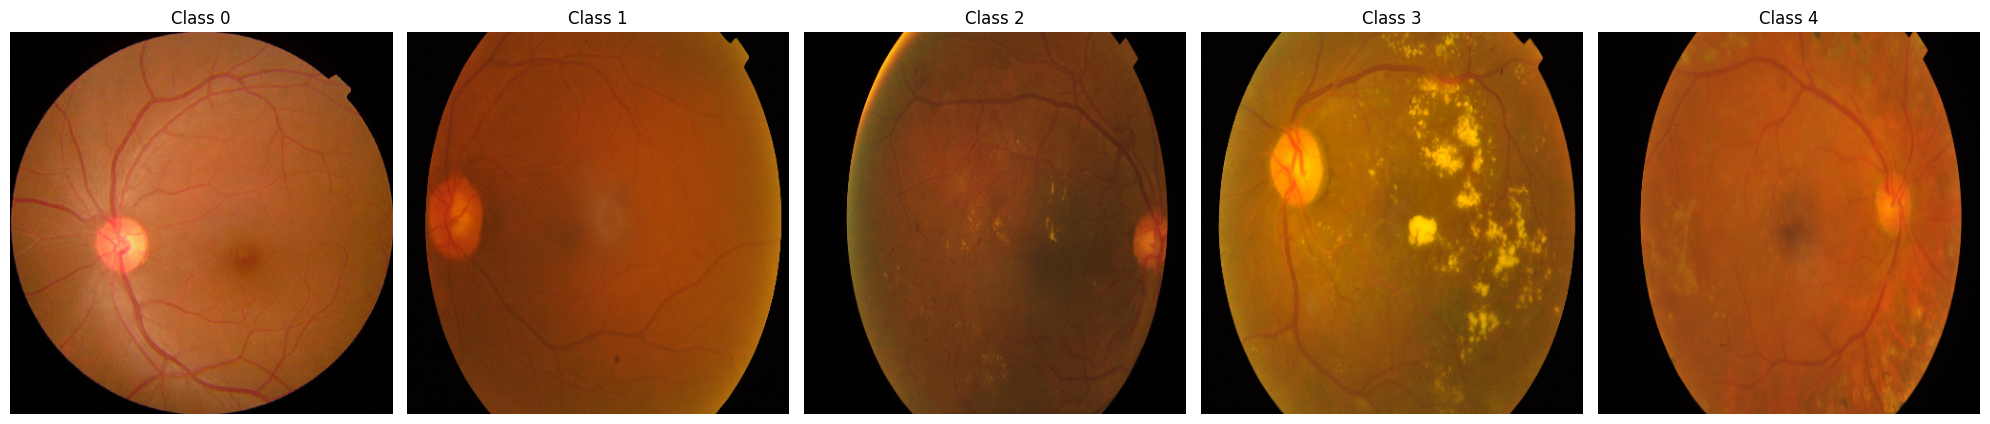

In [6]:
path = "/home/coder/project/"
train = pd.read_csv(path + 'train.csv')

unique_classes = train['diagnosis'].unique()
class_representatives = {cls: None for cls in unique_classes}

for index, row in train.iterrows():
    if class_representatives[row['diagnosis']] is None:
        img_path = os.path.join(path, "train_images", row['id_code'] + '.png')
        image = cv2.imread(img_path)
        image = cv2.resize(image, (400, 400))
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        
        class_representatives[row['diagnosis']] = image
        
        if all(v is not None for v in class_representatives.values()):
            break

fig, axes = plt.subplots(1, len(unique_classes), figsize=(20, 10))  
for cls, image in class_representatives.items():
    ax = axes[cls]  
    ax.imshow(image)
    ax.axis('off')
    ax.set_title(f'Class {cls}')

plt.tight_layout()
plt.show()


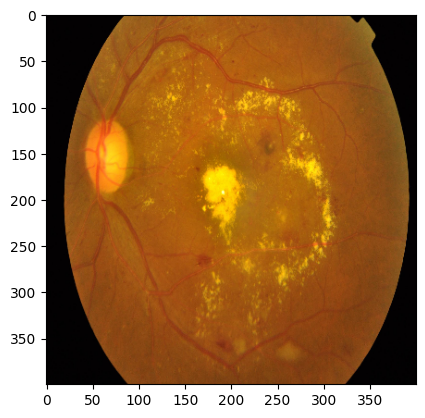

In [7]:
plt.imshow(img_list[13]);

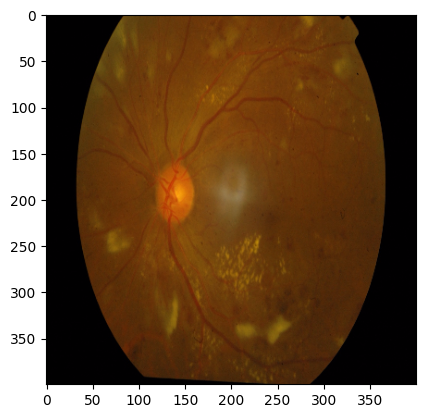

In [8]:
plt.imshow(img_list[12]);

In [9]:
img_list[13].shape

(400, 400, 3)

## Guide to Image Processing


1- Image Thresholding
 * Thresholding is applied to grayscale images and involves converting these images to a binary form.

2- Gaussian Blur
 * Gaussian Blur is utilized to reduce image noise and detail.

3- Contour Detection
 * cv2.RETR_EXTERNAL to extract only the most external contours, which are the prominent outlines of objects in an image.
 
4- Coordinate Extraction
 * Determining the specific points that define the contours.

5- Image Cropping
 * This process involves cutting out the regions of interest from the image based on the contours identified.

6- Image Resizing 
 * Cropping alters the dimensions of the images, necessitating resizing to ensure uniformity in size for further processing.
 
## CLAHE - Contrast-Limited Adaptive Histogram Equalization 
 * To applt CLAHE, we need to convert color from RGB to LAB => cv2.COLOR_RGB2LAB
 * Flatten for Histogram
 * **CLAHE**
 * Merge Operation
 * Convert color from LAB to RGB => cv2.COLOR_LAB2RGB
 * Median Blur for Avoid Noise

## 1. Image Thresholding

(400, 400)

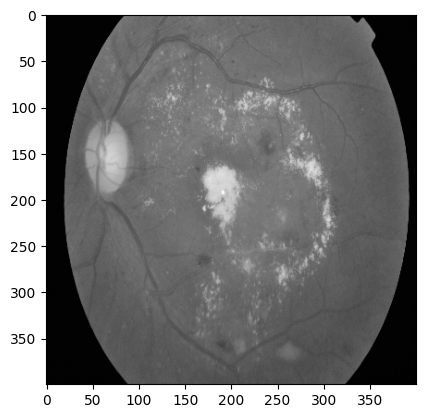

In [10]:
img = cv2.cvtColor(img_list[13].copy(), cv2.COLOR_RGB2GRAY)
plt.imshow(img, cmap='gray');
img.shape

## 2. Gaussian Blur

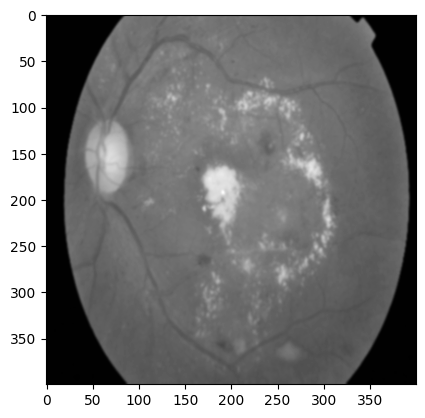

In [11]:
blur = cv2.GaussianBlur(src=img, ksize=(5,5), sigmaX=0)
plt.imshow(blur, cmap='gray');

## 3. Contour Detection

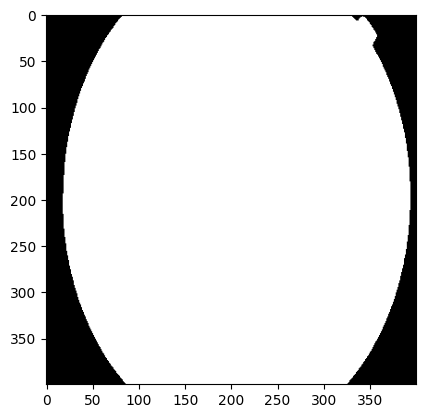

In [12]:
thres = cv2.threshold(blur,10 ,255, cv2.THRESH_BINARY)[1]
plt.imshow(thres, cmap='gray');

Retrieves only the external contour. Compresses horizontal, vertical, and diagonal segments and leaves only their end points.

In [13]:
contour = cv2.findContours(thres.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)[0][0]

contour

array([[[ 83,   0]],

       [[ 83,   1]],

       [[ 78,   6]],

       [[ 78,   7]],

       [[ 75,  10]],

       [[ 75,  11]],

       [[ 73,  13]],

       [[ 73,  14]],

       [[ 70,  17]],

       [[ 70,  18]],

       [[ 68,  20]],

       [[ 68,  21]],

       [[ 66,  23]],

       [[ 66,  24]],

       [[ 64,  26]],

       [[ 64,  27]],

       [[ 63,  28]],

       [[ 63,  29]],

       [[ 61,  31]],

       [[ 61,  32]],

       [[ 60,  33]],

       [[ 60,  34]],

       [[ 59,  35]],

       [[ 59,  36]],

       [[ 57,  38]],

       [[ 57,  39]],

       [[ 56,  40]],

       [[ 56,  41]],

       [[ 55,  42]],

       [[ 55,  43]],

       [[ 54,  44]],

       [[ 54,  45]],

       [[ 53,  46]],

       [[ 53,  47]],

       [[ 52,  48]],

       [[ 52,  49]],

       [[ 51,  50]],

       [[ 51,  51]],

       [[ 50,  52]],

       [[ 50,  53]],

       [[ 49,  54]],

       [[ 49,  55]],

       [[ 48,  56]],

       [[ 48,  57]],

       [[ 47,  58]],

       [[ 

In [14]:
contour.shape

(423, 1, 2)

Reshaping the contour array to eliminate an unnecessary dimension, simplifying it from a three-dimensional array to a two-dimensional one, where each row corresponds to a point (x, y).

In [15]:
contour = contour[:,0,:]
contour.shape

(423, 2)

In [16]:
contour

array([[ 83,   0],
       [ 83,   1],
       [ 78,   6],
       [ 78,   7],
       [ 75,  10],
       [ 75,  11],
       [ 73,  13],
       [ 73,  14],
       [ 70,  17],
       [ 70,  18],
       [ 68,  20],
       [ 68,  21],
       [ 66,  23],
       [ 66,  24],
       [ 64,  26],
       [ 64,  27],
       [ 63,  28],
       [ 63,  29],
       [ 61,  31],
       [ 61,  32],
       [ 60,  33],
       [ 60,  34],
       [ 59,  35],
       [ 59,  36],
       [ 57,  38],
       [ 57,  39],
       [ 56,  40],
       [ 56,  41],
       [ 55,  42],
       [ 55,  43],
       [ 54,  44],
       [ 54,  45],
       [ 53,  46],
       [ 53,  47],
       [ 52,  48],
       [ 52,  49],
       [ 51,  50],
       [ 51,  51],
       [ 50,  52],
       [ 50,  53],
       [ 49,  54],
       [ 49,  55],
       [ 48,  56],
       [ 48,  57],
       [ 47,  58],
       [ 47,  59],
       [ 46,  60],
       [ 46,  62],
       [ 45,  63],
       [ 45,  64],
       [ 44,  65],
       [ 44,  66],
       [ 43,

## 4. Get Coordinates

Find the indices of the maximum and minimum x coordinates (argmax for rightmost point, argmin for leftmost point).

In [18]:
contour[:,0].argmax()

310

In [19]:
contour[:,0].argmin() 

102

In [20]:
contour[111] 

array([ 22, 255], dtype=int32)

Finding bounding points of the external contour in the image,

In [21]:
left = tuple(contour[contour[:,0].argmin()])
right = tuple(contour[contour[:,0].argmax()])
top = tuple(contour[contour[:,1].argmin()])
bottom = tuple(contour[contour[:,1].argmax()])

print(f"left: {left}\nright: {right}\ntop: {top}\nbottom: {bottom}\n")

left: (18, 194)
right: (393, 211)
top: (83, 0)
bottom: (86, 399)



In [22]:
x1 = left[0]
y1 = top[1]
x2 = right[0]
y2 = bottom[1]

print(f"left[0]: {x1}\ntop[1]: {y1}\nright[0]: {x2}\nbottom[1]: {y2}\n")

left[0]: 18
top[1]: 0
right[0]: 393
bottom[1]: 399



## 5. Crop Images

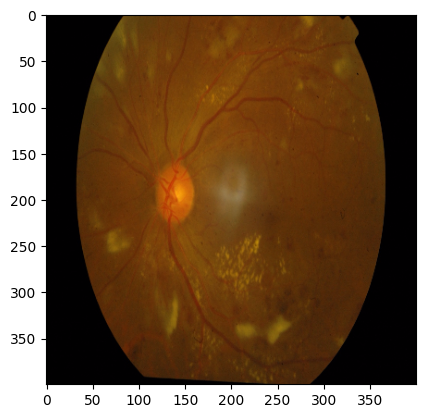

In [23]:
og_img = img_list[12].copy()
plt.imshow(og_img);

shape:  (399, 375, 3)


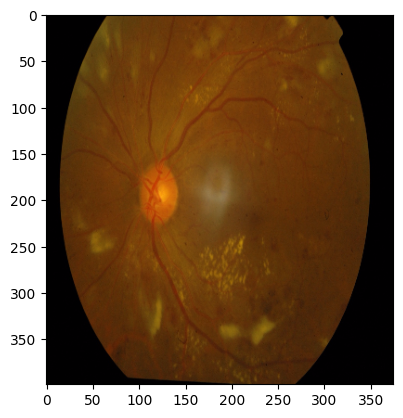

In [24]:
crop_img = og_img[y1:y2, x1:x2]
plt.imshow(crop_img);
print("shape: ",crop_img.shape)

## 6. Resize Images

shape:  (400, 400, 3)


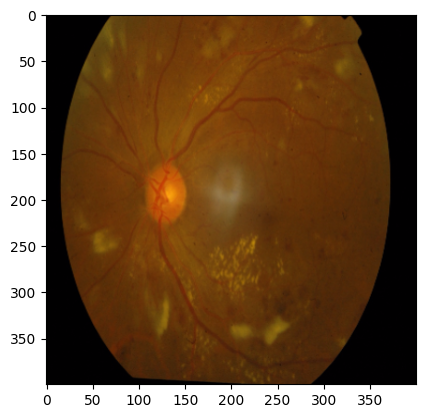

In [25]:
crop_img = cv2.resize(crop_img, (400,400))
plt.imshow(crop_img);
print("shape: ",crop_img.shape)

In [26]:
x = int(x2-x1)*4//100
y = int(y2-y1)*5//100

print(x,y)

15 19


shape:  (361, 345, 3)


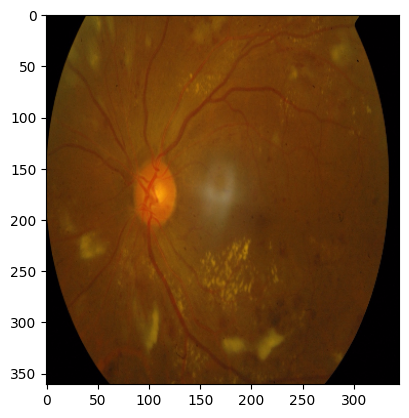

In [27]:
crop_img = og_img[y1+y:y2-y, x1+x:x2-x]
plt.imshow(crop_img);
print("shape: ",crop_img.shape)

shape:  (400, 400, 3)


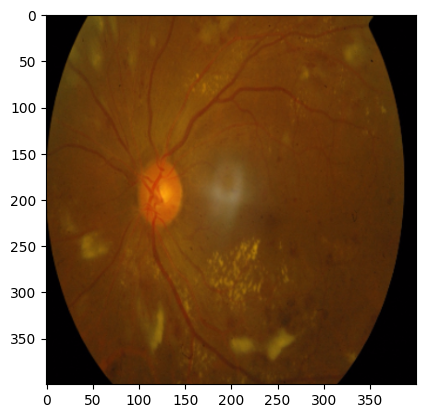

In [28]:
crop_img = cv2.resize(crop_img, (400,400))
plt.imshow(crop_img);
print("shape: ",crop_img.shape)

**cv2.COLOR_RGB2LAB** converts an image from the RGB (Red, Green, Blue) color space to the LAB color space. The LAB color space is particularly useful for image processing because it separates the luminance (lightness) from the color information (chromaticity)
  * LAB 
  * L => Lightness
  * A => Green-Red Opponent Colors
  * B => Blue-Yellow Opponent Colors
 

In [29]:
lab = cv2.cvtColor(crop_img, cv2.COLOR_RGB2LAB)

lab.shape

(400, 400, 3)

In [30]:
l, a, b = cv2.split(lab)

shape:  (400, 400)


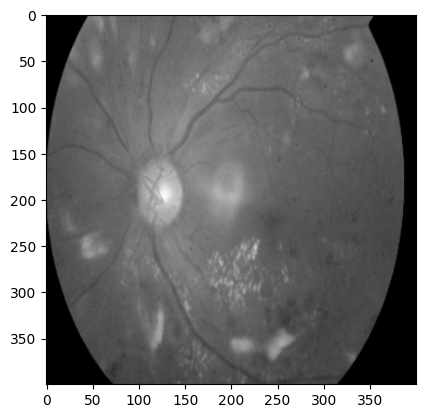

In [31]:
plt.imshow(l, cmap="gray");
print("shape: ", l.shape) # 2D

**Flatten for histogram**

In [32]:
flatten = l.flatten()

flatten.shape

(160000,)

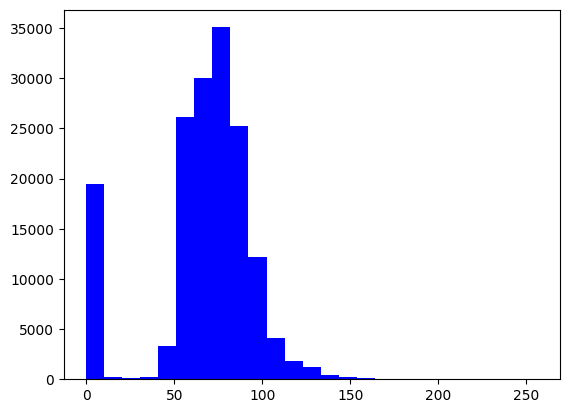

In [33]:
plt.hist(flatten, 25, [0,256], color="b")
plt.show()

## CLAHE - Contrast-Limited Adaptive Histogram Equalization 
Contrast Limited Adaptive Histogram Equalization, is an advanced image processing technique used to improve the contrast of images. 
CLAHE is particularly effective in scenarios where you need to enhance the visibility of features in images that suffer from poor lighting conditions or similar issues that cause low contrast.

In [34]:
clahe = cv2.createCLAHE(clipLimit=7.0, tileGridSize=((8,8)))

cl = clahe.apply(l)

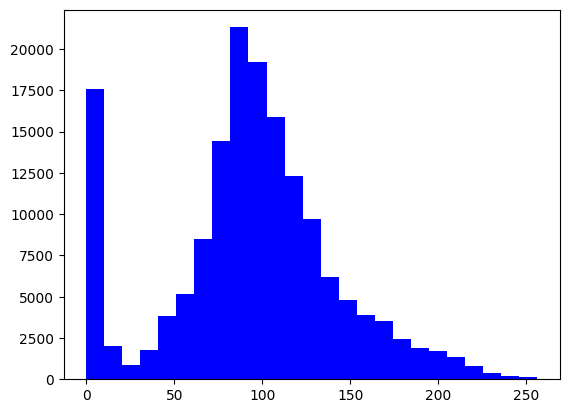

In [35]:
plt.hist(cl.flatten(), 25, [0,256], color="b")
plt.show()

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5)) 

# Display the image before CLAHE
axes[0].imshow(l)
axes[0].set_title("Before CLAHE")
axes[0].axis('off') 

# Display the image after CLAHE
axes[1].imshow(cl)
axes[1].set_title("After CLAHE")
axes[1].axis('off') 

plt.show() 

**Merge other channels**

In [37]:
merge = cv2.merge((cl, a, b))

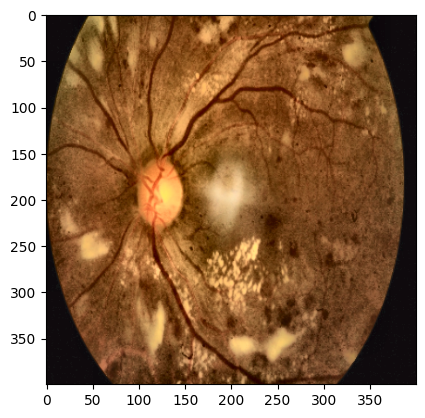

In [38]:
final_img = cv2.cvtColor(merge, cv2.COLOR_LAB2RGB)

plt.imshow(final_img);

**Median blur to avoid noise**

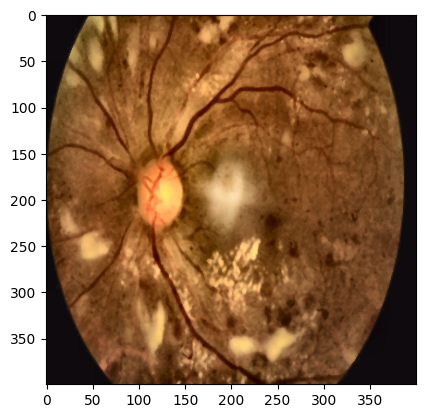

In [39]:
med_blur = cv2.medianBlur(final_img, ksize=3)

plt.imshow(med_blur);

**mask for bleeding veins**

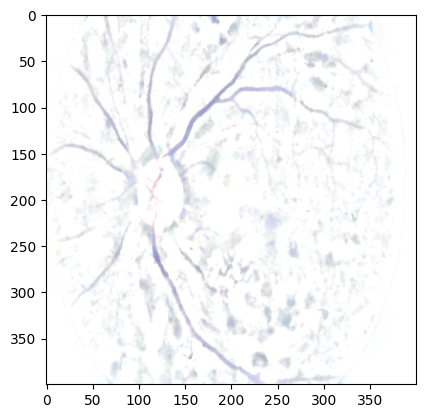

In [45]:
back_ground = cv2.medianBlur(final_img, ksize=35)

mask = cv2.addWeighted(med_blur, 1, back_ground, -1, 255)
plt.imshow(mask)
plt.show()

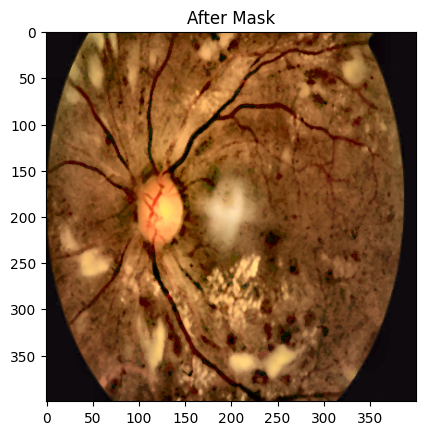

In [41]:
final_mask = cv2.bitwise_and(mask, med_blur)

plt.title("After Mask")
plt.imshow(final_mask);

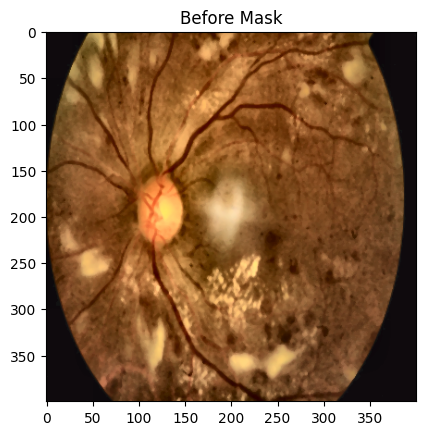

In [42]:
plt.title("Before Mask")
plt.imshow(med_blur);

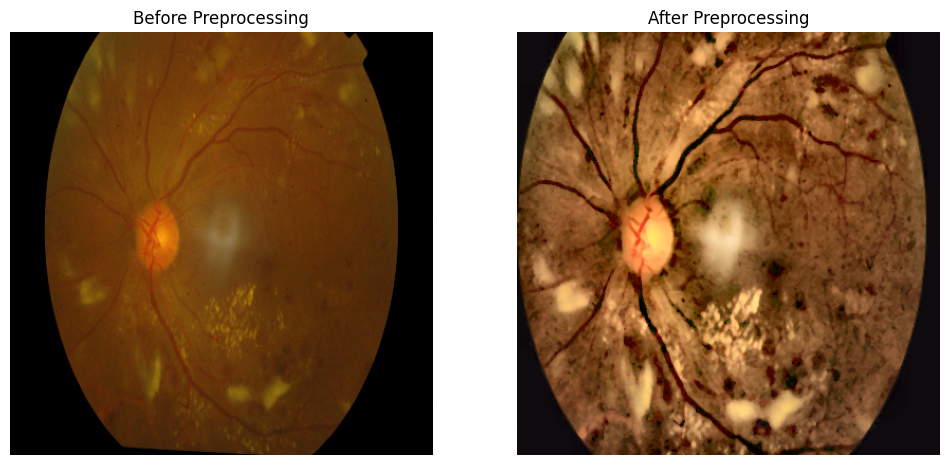

In [43]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6)) 

axes[0].imshow(img_list[12])
axes[0].set_title("Before Preprocessing")
axes[0].axis('off') 

axes[1].imshow(final_mask)
axes[1].set_title("After Preprocessing")
axes[1].axis('off') 

plt.show()

Applying preprocessing to a whole file, creating a new file and saving the preprocessing images there.

**Saving Processed Images**

In [ ]:
from tqdm.notebook import tqdm
import os
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import cv2
import os

path = "/home/coder/project/"
files = os.listdir(path + "train_images")
output_path = "/home/coder/project/processed_images1/"
os.makedirs(output_path, exist_ok=True) 

def preprocessing(files, output_path):
    img_list = []
    for i in tqdm(files):
        image_path = os.path.join(path + 'train_images/', i)
        image = cv2.imread(image_path)
        if image is None:
            print(f"Skipping file {image_path}, unable to read.")
            continue
        image = cv2.resize(image, (240, 240))
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

        copy = image.copy()
        copy = cv2.cvtColor(copy, cv2.COLOR_RGB2GRAY)
        blur = cv2.GaussianBlur(copy, (5, 5), 0)

        thresh = cv2.threshold(blur, 10, 255, cv2.THRESH_BINARY)[1]

        # contour detectin
        contour = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
        contour = contour[0][0]
        contour = contour[:, 0, :]

        # getting coordinates
        x1 = tuple(contour[contour[:, 0].argmin()])[0]
        y1 = tuple(contour[contour[:, 1].argmin()])[1]
        x2 = tuple(contour[contour[:, 0].argmax()])[0]
        y2 = tuple(contour[contour[:, 1].argmax()])[1]

        # crop images, remove black padding
        x = int(x2 - x1) * 4 // 50
        y = int(y2 - y1) * 5 // 50

        # threshold for cropped images 
        copy2 = image.copy()
        if x2 - x1 > 100 and y2 - y1 > 100:
            copy2 = copy2[y1 + y: y2 - y, x1 + x: x2 - x]
            copy2 = cv2.resize(copy2, (240, 240))

        # LAB
        lab = cv2.cvtColor(copy2, cv2.COLOR_RGB2LAB)
        l, a, b = cv2.split(lab)

        # CLAHE
        clahe = cv2.createCLAHE(clipLimit=5.0, tileGridSize=((8, 8)))
        cl = clahe.apply(l)

        # merging channels
        merge = cv2.merge((cl, a, b))
        final_img = cv2.cvtColor(merge, cv2.COLOR_LAB2RGB)
        med_blur = cv2.medianBlur(final_img, 3)
        back_gorund = cv2.medianBlur(final_img, 37)

        # mask for veins
        mask = cv2.addWeighted(med_blur, 1, back_gorund, -1, 255)
        final = cv2.bitwise_and(mask, med_blur)
        img_list.append(final)

        save_path = os.path.join(output_path, f"{i}")
        cv2.imwrite(save_path, cv2.cvtColor(final, cv2.COLOR_RGB2BGR))
        img_list.append(final)

    return img_list

img_list = preprocessing(files=files, output_path=output_path)


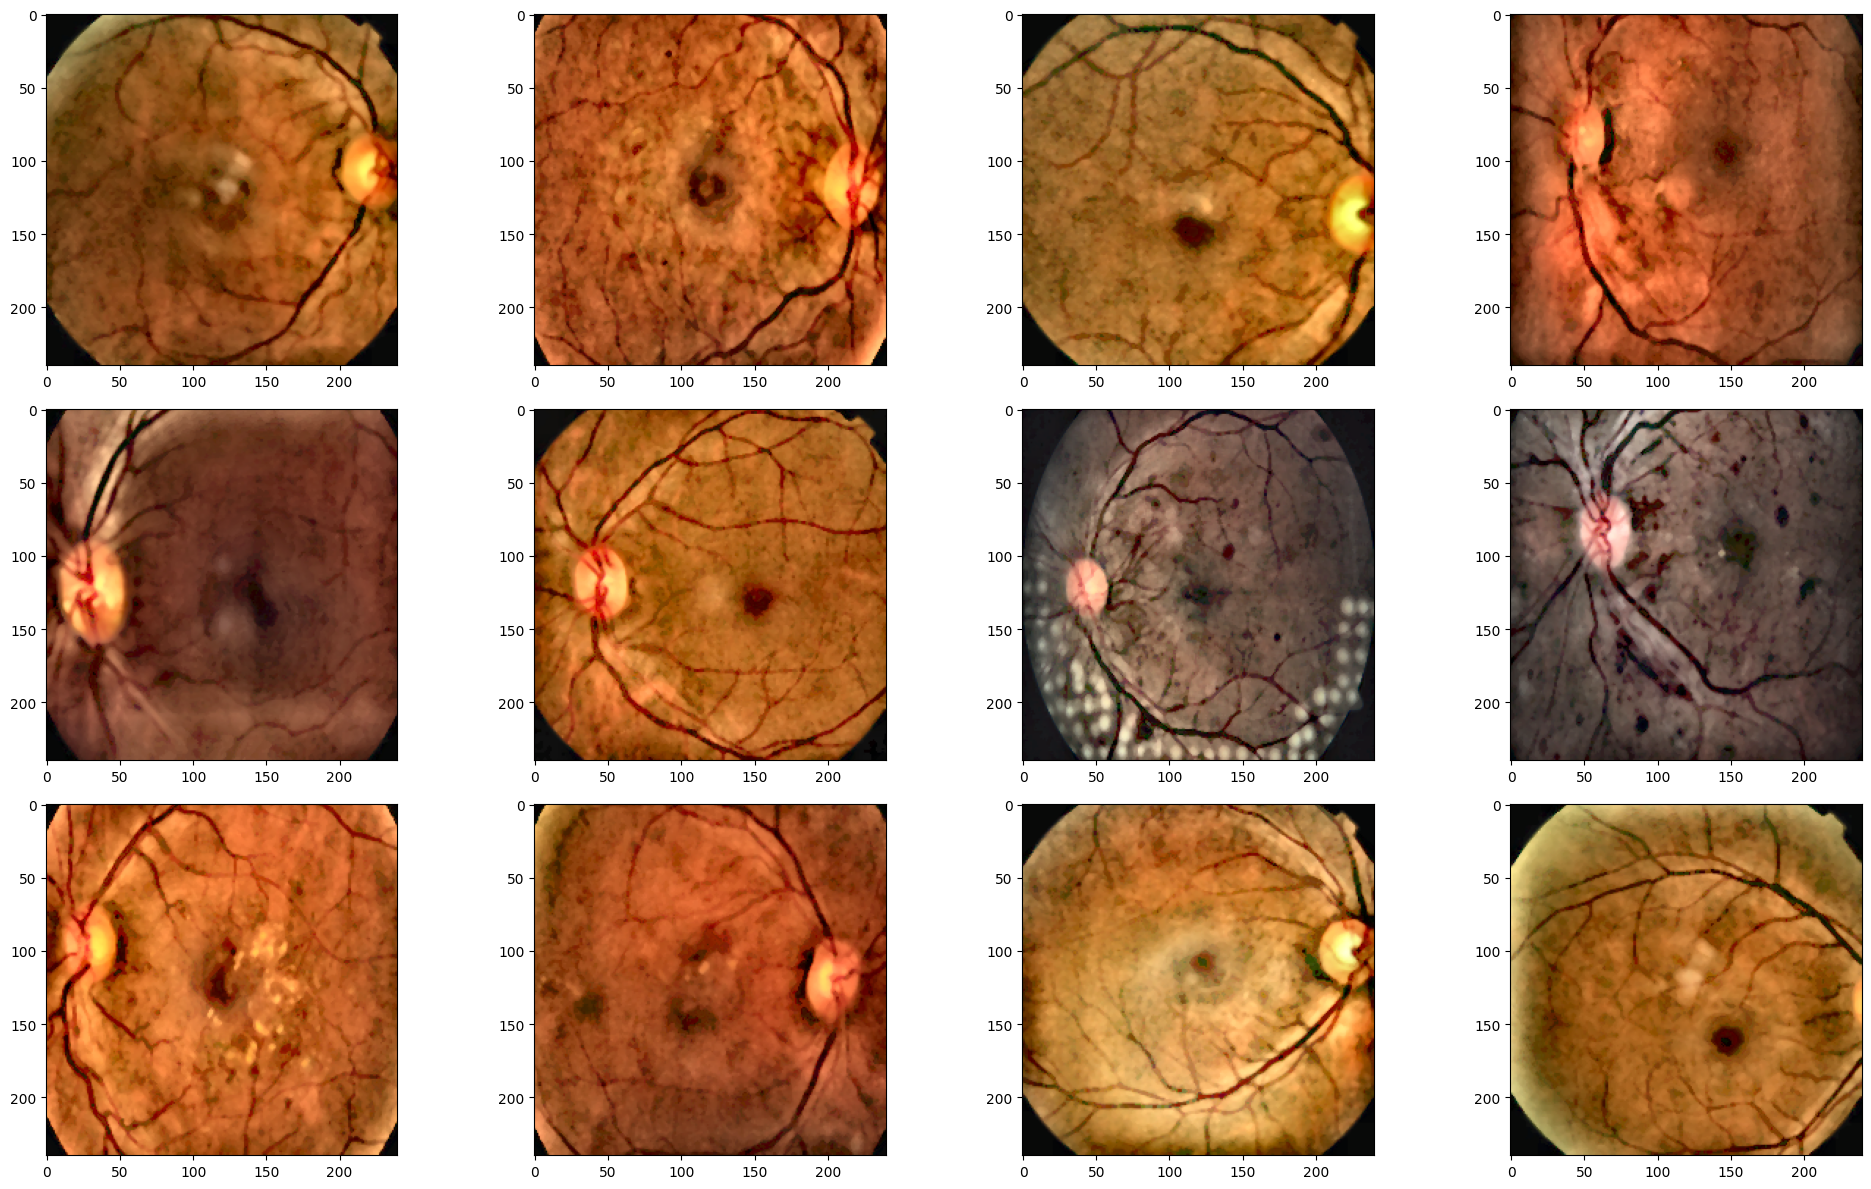

In [ ]:
processed_path = "/home/coder/project/processed_images"
processed_files = os.listdir(processed_path)

fig = plt.figure(figsize=(20, 12))

# Display the first 12 processed images
for i, file in enumerate(processed_files[:12]):  
    img_path = os.path.join(processed_path, file)
    img = cv2.imread(img_path)
    # Convert BGR to RGB 
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  

    fig.add_subplot(3, 4, i + 1)
    plt.imshow(img)

plt.tight_layout()
plt.show()

The conversion from BGR to RGB format is necessary because OpenCV reads images in BGR format by default, whereas matplotlib expects images in RGB format for correct color representation. 